In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
testfile="test_housing.txt"
datafile="housing.txt"

In [153]:
#load dataset
data = np.loadtxt(datafile , usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12])
data_dim = data.shape
y = np.loadtxt(datafile ,usecols=[13]).reshape(data_dim[0],1)

In [154]:
#load test dataset
test_data = np.loadtxt(testfile , usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12])
test_data_dim = test_data.shape
test_y = np.loadtxt(testfile ,usecols=[13]).reshape(test_data_dim[0],1)

In [155]:
#normalize dataset and test data
full_data = np.vstack((data,test_data))
min_data = np.min(full_data)
max_data = np.max(full_data)
for i in range(13):
    if min_data == 0 and max_data == 0 :
        continue
    else:
        data[:,i] = (data[:,i] - min_data)/(max_data - min_data)
        test_data[:,i] = (test_data[:,i] - min_data)/(max_data - min_data)



In [156]:
#add bias term in dataset and test data

tmp = np.ones((data_dim[0],1))
x = np.hstack((tmp,data))
x = np.float32(x)

tmp = np.ones((test_data_dim[0],1))
test = np.hstack((tmp,test_data))
test = np.float32(test)

In [325]:
#definitions
#error L2 norm error
num_prop = 14
lr = 0.30
weight = np.random.random((num_prop,1))
n = data_dim[0]
num_iter = 100
trans_x = x.transpose()
err = np.zeros([num_iter,1])

In [326]:
#Gradient Descent with weighted learning rate
for step in range(num_iter):
    y_pred = x.dot(weight)
    diff_y = y_pred - y
    dev_wt = trans_x.dot(diff_y)
    weight = weight - (lr/(step+1))*(dev_wt/n)
    err[step] = ((np.sum(diff_y**2))/(2*n))

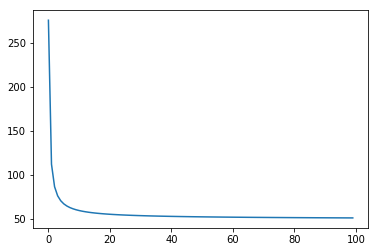

In [327]:
#plot loss function
Xplot = np.arange(num_iter)
plt.plot(Xplot,err)
plt.show()

In [328]:
print(np.min(err))

50.7608034629


In [329]:
test_pred = test.dot(weight)
test_diff_y = test_pred - test_y
test_err = ((np.sum(test_diff_y**2))/(2*test_data_dim[0]))
print(test_err)

8.47915085889


In [330]:
rel_err = test_diff_y / test_y
percent_err = 100*(np.sum(np.absolute(rel_err)))/test_data_dim[0]
percent_accuracy = 100 - percent_err
print("Accuracy: {}".format(percent_accuracy))

Accuracy: 87.1867912146
